In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
%matplotlib inline

In [2]:
# JUST Plot function
def plot(data, set_cluster, means, colors, cov):
    plt.figure(figsize=(7,7))
    labels = [i+1 for i in range(len(colors))]
    ax = plt.subplot(1, 1, 1)
    data_x = data[:, 0]
    data_y = data[:, 1]
        
    for i in range(len(data)):
        ax.scatter(data_x[i], data_y[i], marker="o", color=colors[set_cluster[i]], s=100, edgecolors='black')
    
    for k in range(len(means)):
        kx = means[k][0]
        ky = means[k][1]
        ax.scatter(kx, ky, marker="*", color=colors[k], s=400, edgecolors='black', label = labels[k])
        
        N    = 500
        X    = np.linspace(-10, 10, N)
        Y    = np.linspace(-10, 10, N)
        X, Y = np.meshgrid(X, Y)
        pos  = np.dstack((X, Y))
        rv   = multivariate_normal(means[k], cov[k])
        Z    = rv.pdf(pos)

        ax.contour(X, Y, Z)
        
    ax.legend()
    plt.show()

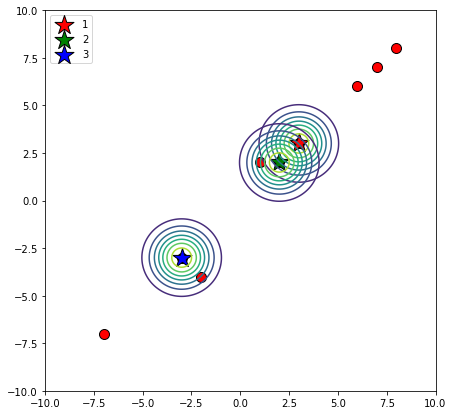

In [3]:
######################## SETUP ###############################
# x and y coordinate.
data = np.array([[1,2],[3,3],[2,2],[8,8],[6,6],[7,7],[-3,-3],[-2,-4],[-7,-7]])
data_x = data[:, 0]
data_y = data[:, 1]
set_cluster = np.zeros(len(data), dtype=int)

# T1: starting point K=3 --> (3,3) (2,2) (-3,-3)

# Set starting point for cluser centroid
k = 3
means = np.array([[3,3],[2,2],[-3,-3]], dtype=float)

cov = []
for i in range(k):
    cov.append(np.eye(len(data[0])))

colors = ['red', 'green', 'blue', 'yellow', 'brown']
plot(data, set_cluster, means, colors, cov)

In [58]:
def prob(data, mu, cov):
    dist = multivariate_normal(mean=mu, cov=cov)
    return dist.pdf(data)

def E_step(data, k, W, mu, cov):
    p = np.zeros((len(data), k))
    for j in range(k):
        p_j = prob(data, mu[j], cov[j])
        p[:, j] = (p_j*W[j])
    sum_pj = np.sum(p, axis=1)
    sum_pj = sum_pj.reshape(len(data), 1)
    return p/sum_pj

def M_step(data, k, p, W, mu, cov):
    # Update parameters
    sum_term = np.sum(p, axis=0)
    N = len(data)
    
    W = sum_term/N
    mu = np.dot(p.T, data)/sum_term.reshape(k,1)
    
    for j in range(k):
        w_j = p[:,j].reshape(len(data), 1)
        var_j = np.dot((((data-mu[j]) * w_j)).T,(data-mu[j]))
        var_j = var_j/sum_term[j]
        var_j = var_j * np.eye(len(data[0]))
        cov[j] = var_j
    
    return W, mu, cov

def likelihood(data, k, W, mu, cov):
    p = np.zeros((len(data), k))
    for j in range(k):
        p_j = prob(data, mu[j], cov[j])
        p[:, j] = (p_j*W[j])
    return np.sum(np.log(np.max(p, axis=1)), axis=0)

In [67]:
# Init GMM
# Using 3 Mixture models
mu = [[3,3],[2,2], [-3,-3]] # Init means
k = len(mu)

cov = []
for i in range(k):
    cov.append(np.eye(len(data[0])))

W = np.full(k, 1/k) #equal mixture weights

ITERATION :  1  E-step

Log likelihood =  -93.9284041956971


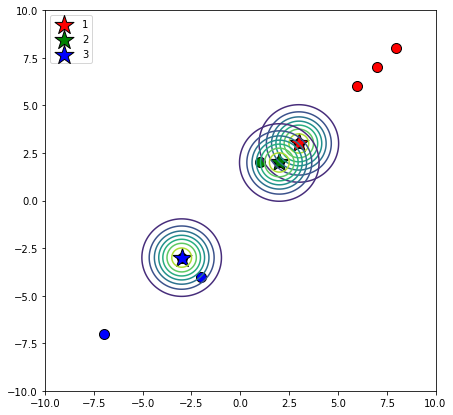

Point [1 2] : Assign to G1: 0.12 G2: 0.88 G3: 0.00
Point [3 3] : Assign to G1: 0.73 G2: 0.27 G3: 0.00
Point [2 2] : Assign to G1: 0.27 G2: 0.73 G3: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 0.00 G3: 1.00

Prior(m) = G1: 0.46 G1: 0.21 G1: 0.33

Mean for G1 = 5.79, 5.82
Mean for G2 = 1.68, 2.15
Mean for G3 = -4.00, -4.67
Covariance for G1 = 4.54, 4.29
Covariance for G2 = 0.52, 0.13
Covariance for G3 = 4.67, 2.89

    M-step


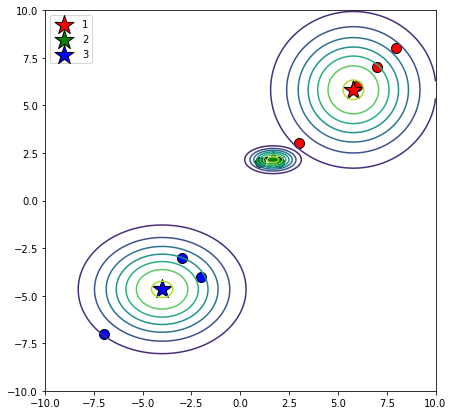

ITERATION :  2  E-step

Log likelihood =  -40.15793220822257


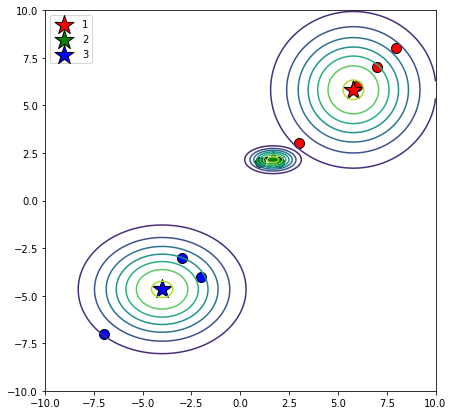

Point [1 2] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [3 3] : Assign to G1: 0.66 G2: 0.34 G3: 0.00
Point [2 2] : Assign to G1: 0.01 G2: 0.99 G3: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 0.00 G3: 1.00

Prior(m) = G1: 0.41 G1: 0.26 G1: 0.33

Mean for G1 = 6.27, 6.27
Mean for G2 = 1.72, 2.15
Mean for G3 = -4.00, -4.67
Covariance for G1 = 2.95, 2.94
Covariance for G2 = 0.50, 0.13
Covariance for G3 = 4.67, 2.89

    M-step


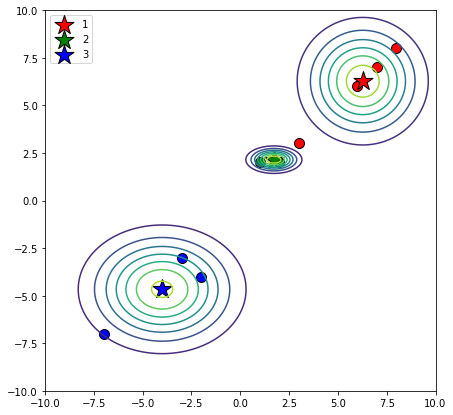

ITERATION :  3  E-step

Log likelihood =  -39.08847313166625


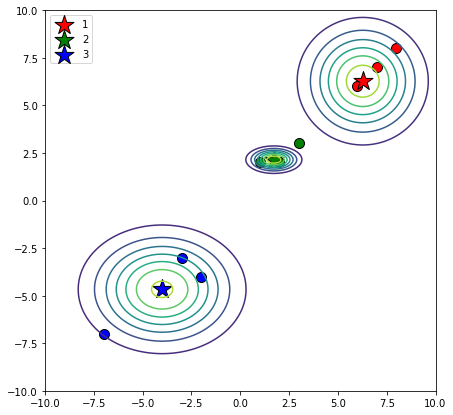

Point [1 2] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [3 3] : Assign to G1: 0.25 G2: 0.75 G3: 0.00
Point [2 2] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 0.00 G3: 1.00

Prior(m) = G1: 0.36 G1: 0.31 G1: 0.33

Mean for G1 = 6.70, 6.70
Mean for G2 = 1.91, 2.27
Mean for G3 = -4.00, -4.67
Covariance for G1 = 1.74, 1.74
Covariance for G2 = 0.63, 0.20
Covariance for G3 = 4.67, 2.89

    M-step


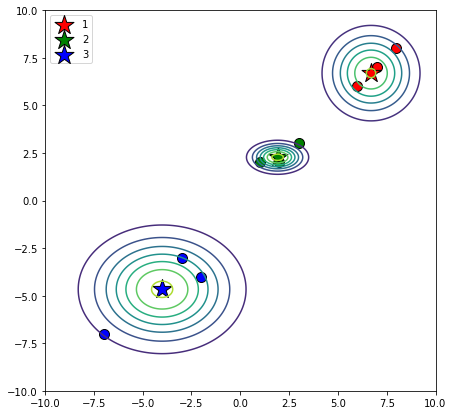

ITERATION :  4  E-step

Log likelihood =  -36.51388549356422


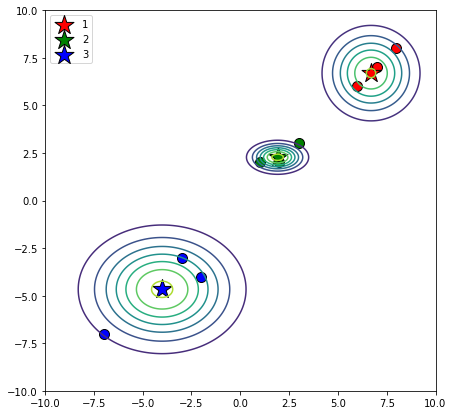

Point [1 2] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [3 3] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [2 2] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 0.00 G3: 1.00

Prior(m) = G1: 0.33 G1: 0.33 G1: 0.33

Mean for G1 = 7.00, 7.00
Mean for G2 = 2.00, 2.33
Mean for G3 = -4.00, -4.67
Covariance for G1 = 0.67, 0.67
Covariance for G2 = 0.67, 0.22
Covariance for G3 = 4.67, 2.89

    M-step


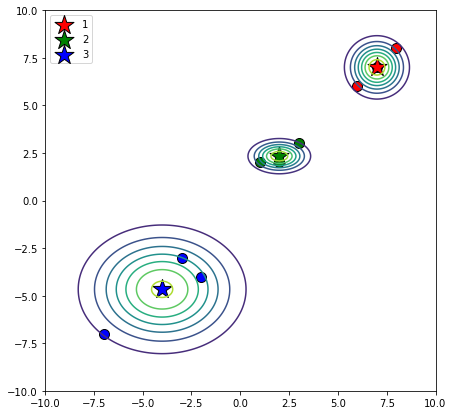

ITERATION :  5  E-step

Log likelihood =  -35.24974859150818


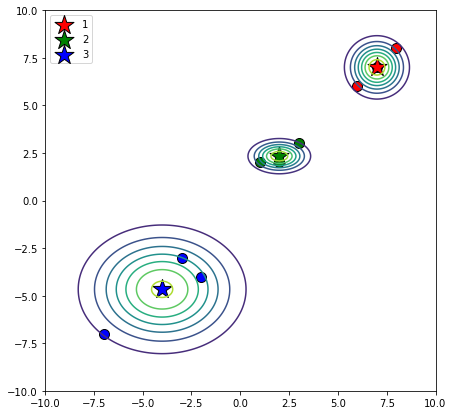

Point [1 2] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [3 3] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [2 2] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 0.00 G3: 1.00

Prior(m) = G1: 0.33 G1: 0.33 G1: 0.33

Mean for G1 = 7.00, 7.00
Mean for G2 = 2.00, 2.33
Mean for G3 = -4.00, -4.67
Covariance for G1 = 0.67, 0.67
Covariance for G2 = 0.67, 0.22
Covariance for G3 = 4.67, 2.89

    M-step


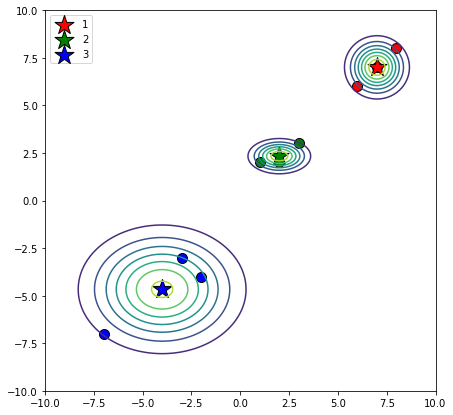

ITERATION :  6  E-step

Log likelihood =  -35.24967061899658


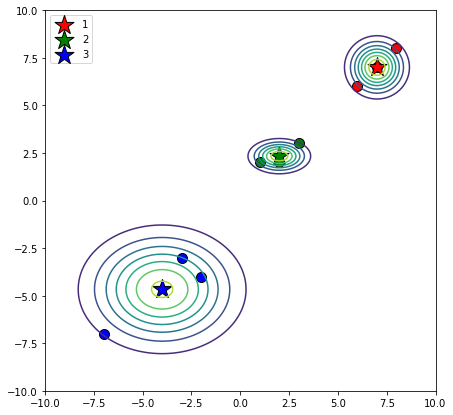

Point [1 2] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [3 3] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [2 2] : Assign to G1: 0.00 G2: 1.00 G3: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00 G3: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 0.00 G3: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 0.00 G3: 1.00

Prior(m) = G1: 0.33 G1: 0.33 G1: 0.33

Mean for G1 = 7.00, 7.00
Mean for G2 = 2.00, 2.33
Mean for G3 = -4.00, -4.67
Covariance for G1 = 0.67, 0.67
Covariance for G2 = 0.67, 0.22
Covariance for G3 = 4.67, 2.89

    M-step


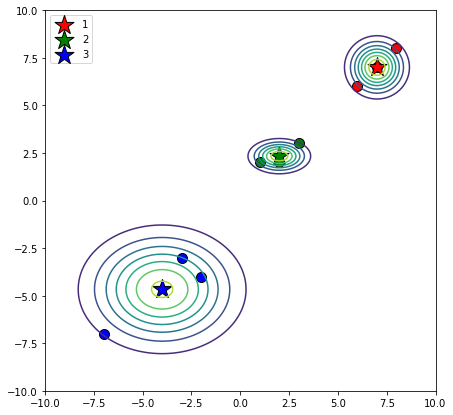

In [68]:
# EM ITERATION
iterate = 6
llh3 = []
set_cluster = np.zeros(len(data), dtype=int)
for i in range(iterate):
    p = E_step(data, k, W, mu, cov)
    set_cluster = np.argmax(p, axis=1)
    print("ITERATION : ", i+1, " E-step")
    print("\nLog likelihood = ", likelihood(data, k ,W, mu, cov))
    llh3.append(likelihood(data, k ,W, mu, cov))
    plot(data, set_cluster, mu, colors, cov)
    W, mu, std = M_step(data, k , p, W, mu, cov)
    for x in range(len(data)):
        print(f"Point {data[x]} : Assign to G1: {p[x][0]:0.2f} G2: {p[x][1]:0.2f} G3: {p[x][2]:0.2f}")
    print(f"\nPrior(m) = G1: {W[0]:0.2f} G1: {W[1]:0.2f} G1: {W[2]:0.2f}\n")
    for g in range(k):
        print(f"Mean for G{g+1} = {mu[g][0]:0.2f}, {mu[g][1]:0.2f}")
    for g in range(k):
        print(f"Covariance for G{g+1} = {std[g][0][0]:0.2f}, {std[g][1][1]:0.2f}")
    print("\n    M-step")
    plot(data, set_cluster, mu, colors, cov)
    

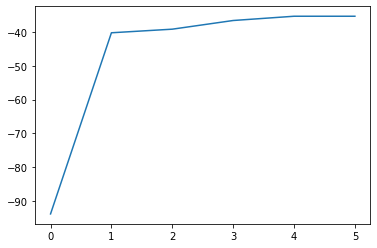

In [69]:
plt.plot(llh3)

# Two Gaussian

In [87]:
# Init GMM
# Using 3 Mixture models
mu = [[3,3], [-3,-3]] # Init means
k = len(mu)

cov = []
for i in range(k):
    cov.append(np.eye(len(data[0])))

W = np.full(k, 1/k) #equal mixture weights

ITERATION :  1  E-step

Log likelihood =  -93.27921822272361


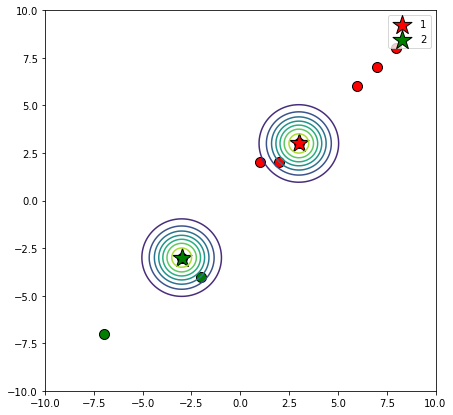

Point [1 2] : Assign to G1: 1.00 G2: 0.00
Point [3 3] : Assign to G1: 1.00 G2: 0.00
Point [2 2] : Assign to G1: 1.00 G2: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 1.00

Prior(m) = G1: 0.67 G1: 0.33

Mean for G1 = 4.50, 4.67
Mean for G2 = -4.00, -4.67
Covariance for G1 = 6.92, 5.89
Covariance for G2 = 4.67, 2.89

    M-step


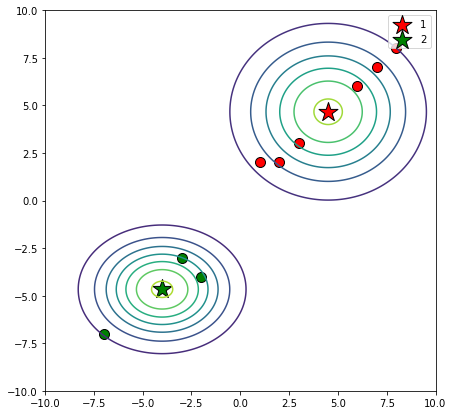

ITERATION :  2  E-step

Log likelihood =  -46.29250049745954


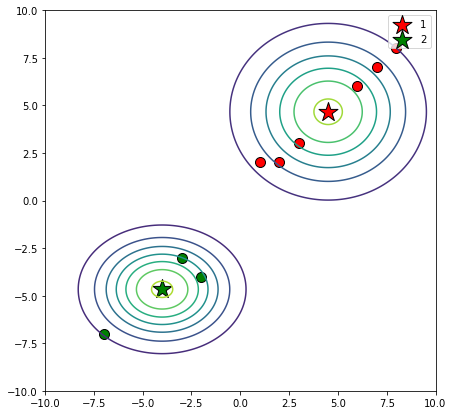

Point [1 2] : Assign to G1: 1.00 G2: 0.00
Point [3 3] : Assign to G1: 1.00 G2: 0.00
Point [2 2] : Assign to G1: 1.00 G2: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 1.00

Prior(m) = G1: 0.67 G1: 0.33

Mean for G1 = 4.50, 4.67
Mean for G2 = -4.00, -4.67
Covariance for G1 = 6.92, 5.89
Covariance for G2 = 4.67, 2.89

    M-step


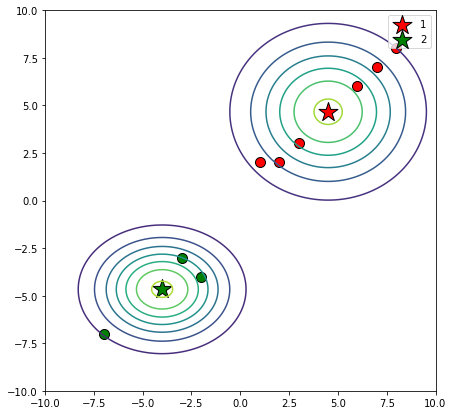

ITERATION :  3  E-step

Log likelihood =  -46.29250206931249


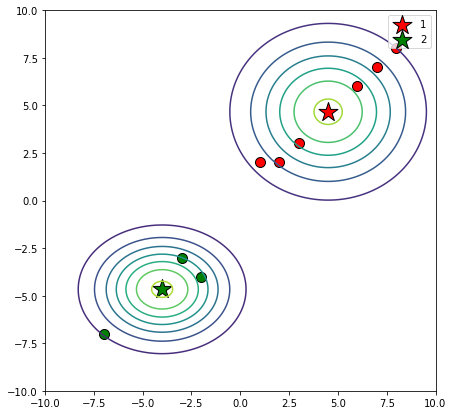

Point [1 2] : Assign to G1: 1.00 G2: 0.00
Point [3 3] : Assign to G1: 1.00 G2: 0.00
Point [2 2] : Assign to G1: 1.00 G2: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 1.00

Prior(m) = G1: 0.67 G1: 0.33

Mean for G1 = 4.50, 4.67
Mean for G2 = -4.00, -4.67
Covariance for G1 = 6.92, 5.89
Covariance for G2 = 4.67, 2.89

    M-step


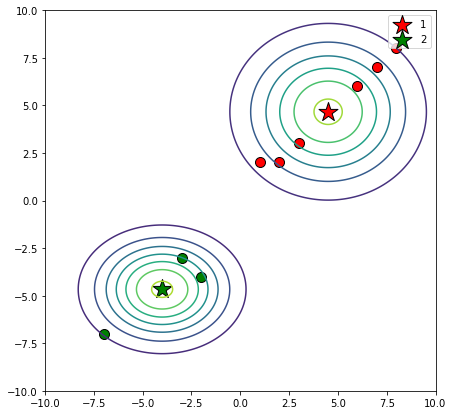

ITERATION :  4  E-step

Log likelihood =  -46.29250208780138


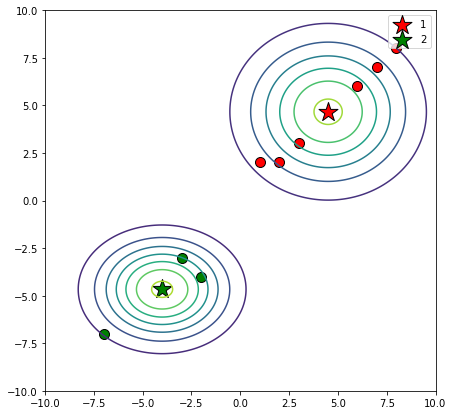

Point [1 2] : Assign to G1: 1.00 G2: 0.00
Point [3 3] : Assign to G1: 1.00 G2: 0.00
Point [2 2] : Assign to G1: 1.00 G2: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 1.00

Prior(m) = G1: 0.67 G1: 0.33

Mean for G1 = 4.50, 4.67
Mean for G2 = -4.00, -4.67
Covariance for G1 = 6.92, 5.89
Covariance for G2 = 4.67, 2.89

    M-step


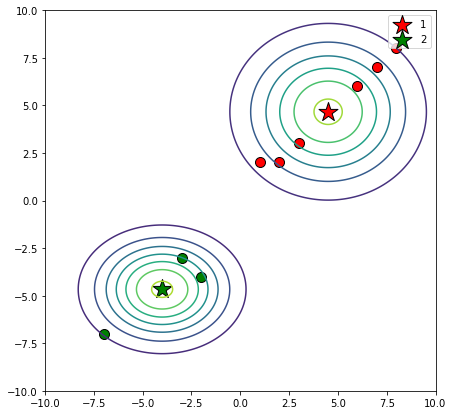

ITERATION :  5  E-step

Log likelihood =  -46.29250208791043


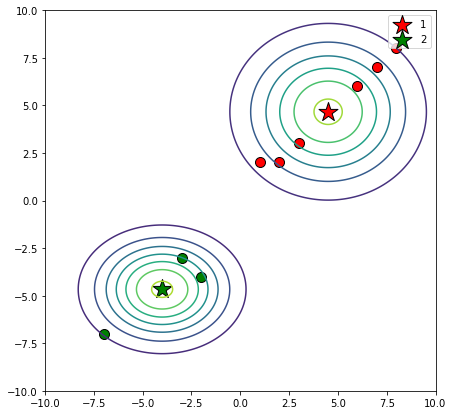

Point [1 2] : Assign to G1: 1.00 G2: 0.00
Point [3 3] : Assign to G1: 1.00 G2: 0.00
Point [2 2] : Assign to G1: 1.00 G2: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 1.00

Prior(m) = G1: 0.67 G1: 0.33

Mean for G1 = 4.50, 4.67
Mean for G2 = -4.00, -4.67
Covariance for G1 = 6.92, 5.89
Covariance for G2 = 4.67, 2.89

    M-step


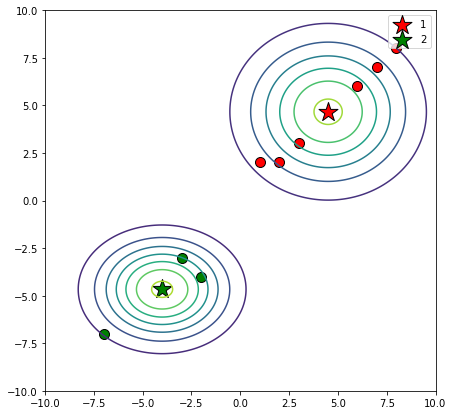

ITERATION :  6  E-step

Log likelihood =  -46.292502087911075


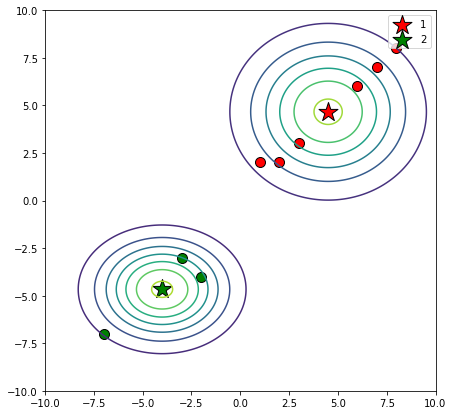

Point [1 2] : Assign to G1: 1.00 G2: 0.00
Point [3 3] : Assign to G1: 1.00 G2: 0.00
Point [2 2] : Assign to G1: 1.00 G2: 0.00
Point [8 8] : Assign to G1: 1.00 G2: 0.00
Point [6 6] : Assign to G1: 1.00 G2: 0.00
Point [7 7] : Assign to G1: 1.00 G2: 0.00
Point [-3 -3] : Assign to G1: 0.00 G2: 1.00
Point [-2 -4] : Assign to G1: 0.00 G2: 1.00
Point [-7 -7] : Assign to G1: 0.00 G2: 1.00

Prior(m) = G1: 0.67 G1: 0.33

Mean for G1 = 4.50, 4.67
Mean for G2 = -4.00, -4.67
Covariance for G1 = 6.92, 5.89
Covariance for G2 = 4.67, 2.89

    M-step


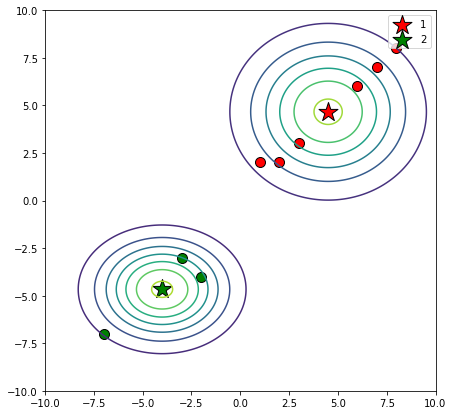

In [88]:
# EM ITERATION
iterate = 6
llh2 = []
set_cluster = np.zeros(len(data), dtype=int)
for i in range(iterate):
    p = E_step(data, k, W, mu, cov)
    set_cluster = np.argmax(p, axis=1)
    print("ITERATION : ", i+1, " E-step")
    print("\nLog likelihood = ", likelihood(data, k ,W, mu, cov))
    llh2.append(likelihood(data, k ,W, mu, cov))
    plot(data, set_cluster, mu, colors, cov)
    W, mu, std = M_step(data, k , p, W, mu, cov)
    for x in range(len(data)):
        print(f"Point {data[x]} : Assign to G1: {p[x][0]:0.2f} G2: {p[x][1]:0.2f}")
    print(f"\nPrior(m) = G1: {W[0]:0.2f} G1: {W[1]:0.2f}\n")
    for g in range(k):
        print(f"Mean for G{g+1} = {mu[g][0]:0.2f}, {mu[g][1]:0.2f}")
    for g in range(k):
        print(f"Covariance for G{g+1} = {std[g][0][0]:0.2f}, {std[g][1][1]:0.2f}")
    print("\n    M-step")
    plot(data, set_cluster, mu, colors, cov)
    

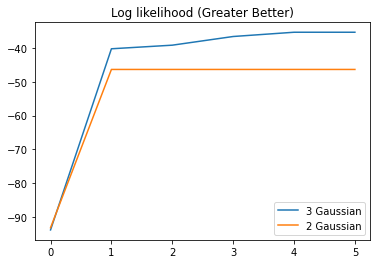

In [89]:
plt.plot(llh3, label="3 Gaussian")
plt.plot(llh2, label="2 Gaussian")
plt.title("Log likelihood (Greater Better)")
plt.legend()
plt.show()